In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the data
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#data dimesnions
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

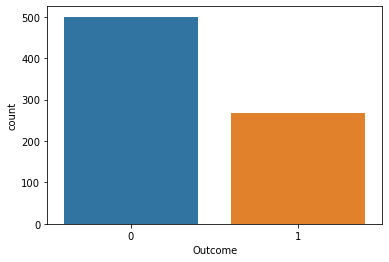

In [5]:
sns.countplot(x='Outcome',data=data)

In [6]:
data['Outcome'].value_counts()
#Here 1 represents the presences of diabetes and 0 represents there is no diabetes

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

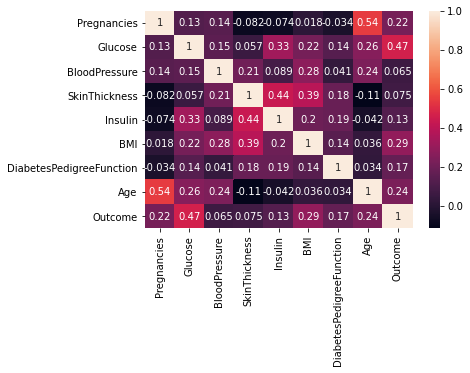

In [7]:
#correlation matrix between the variables
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True)

outcome is heavily dependent on "Glucose".

# Data Cleaning

In [8]:
data.isnull().values.any()

False

There are no null values present and all are numerial so there is no need of encoding

In [9]:
#Data alocation:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape

(768, 8)

In [10]:
#removing less relative columns
x = data.drop(['Pregnancies','BloodPressure', 'SkinThickness','Outcome'],axis=1)
y = data.iloc[:,-1]

In [11]:
print('Total number of rows: {}'.format(len(data)))
print('Total number of missing values in Glucose: {}'.format(len(data.loc[data['Glucose'] == 0])))
print('Total number of missing values in Insulin: {}'.format(len(data.loc[data['Insulin']==0])))
print('Total number of missing values in BMI: {}'.format(len(data.loc[data['BMI']==0])))



Total number of rows: 768
Total number of missing values in Glucose: 5
Total number of missing values in Insulin: 374
Total number of missing values in BMI: 11


In [12]:
from sklearn.impute import SimpleImputer

fillvalue = SimpleImputer(missing_values=0, strategy='mean')

x = fillvalue.fit_transform(x)

In [13]:
#Training and test test splliting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [14]:
x_train.shape

(614, 5)

In [15]:
x_test.shape

(154, 5)

In [16]:
#Feature Scaling for transforming the independent data onto a fixed range
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
x_train

array([[ 0.93627156, -0.35156532,  0.36780137,  0.67740401,  1.69955804],
       [-0.81645845, -0.01227855, -0.63382702, -0.07049698, -0.96569189],
       [ 1.43232723,  6.00972644,  2.81463643, -0.11855487, -0.88240283],
       ...,
       [-0.91566959, -0.01227855, -1.13464121, -0.95656442, -1.04898095],
       [-1.21330299, -0.01227855, -0.36195646, -0.50001442,  0.11706589],
       [ 0.47328628, -0.01227855, -0.02462752,  0.52121586,  2.94889395]])

# Exploratory Data Analysis

C:\Users\saith\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Glucose')

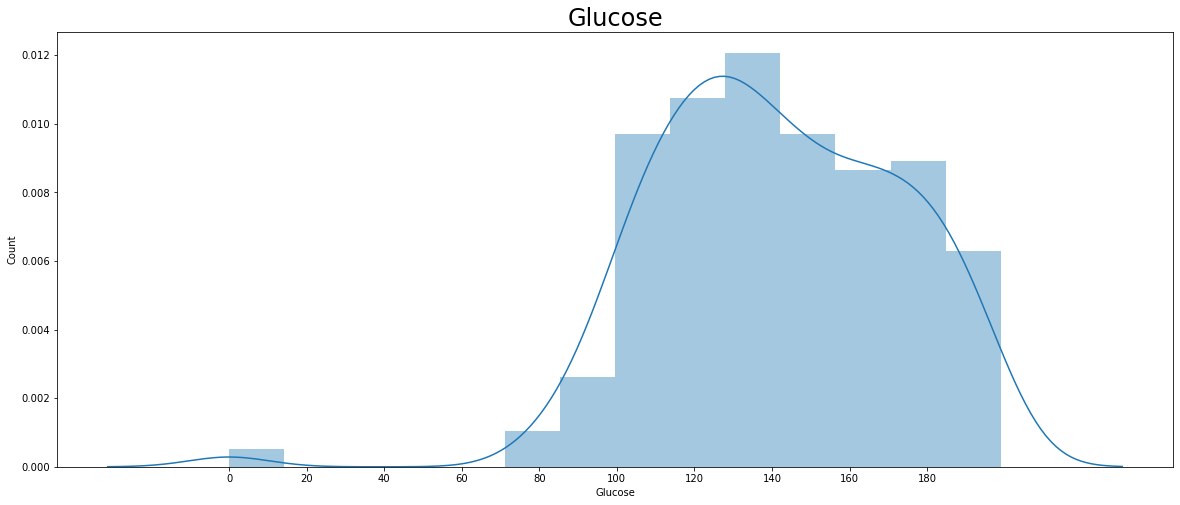

In [18]:
fig = plt.figure(figsize = (20,8))

sns.distplot(data['Glucose'][data['Outcome'] == 1])
plt.xticks([i for i in range (0,200,20)])
plt.ylabel('Count')
plt.title('Glucose',fontsize=24)

C:\Users\saith\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin')

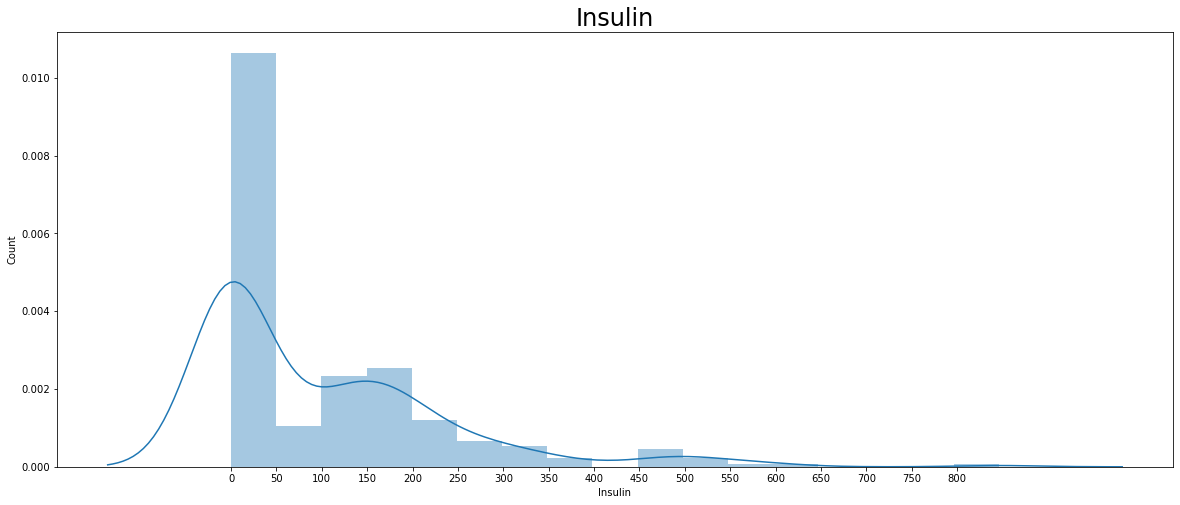

In [19]:
fig = plt.figure(figsize=(20,8))

sns.distplot(data['Insulin'][data['Outcome'] == 1])
plt.xticks([i for i in range (0,850,50)])
plt.ylabel('Count')
plt.title('Insulin',fontsize=24)

C:\Users\saith\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI')

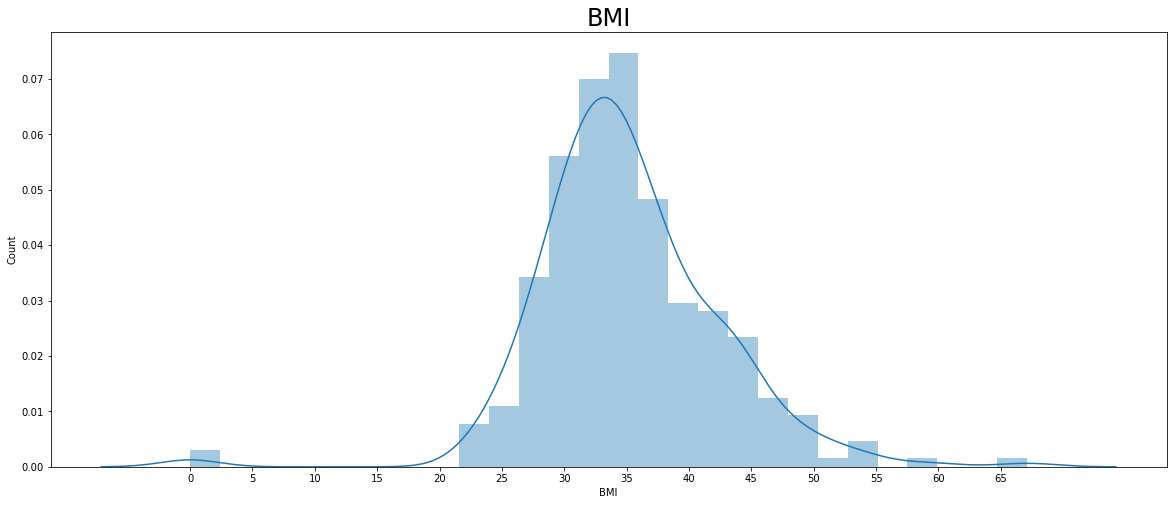

In [20]:
fig = plt.figure(figsize=(20,8))

sns.distplot(data['BMI'][data['Outcome'] == 1])
plt.xticks([i for i in range (0,70,5)])
plt.ylabel('Count')
plt.title('BMI',fontsize=24)

C:\Users\saith\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

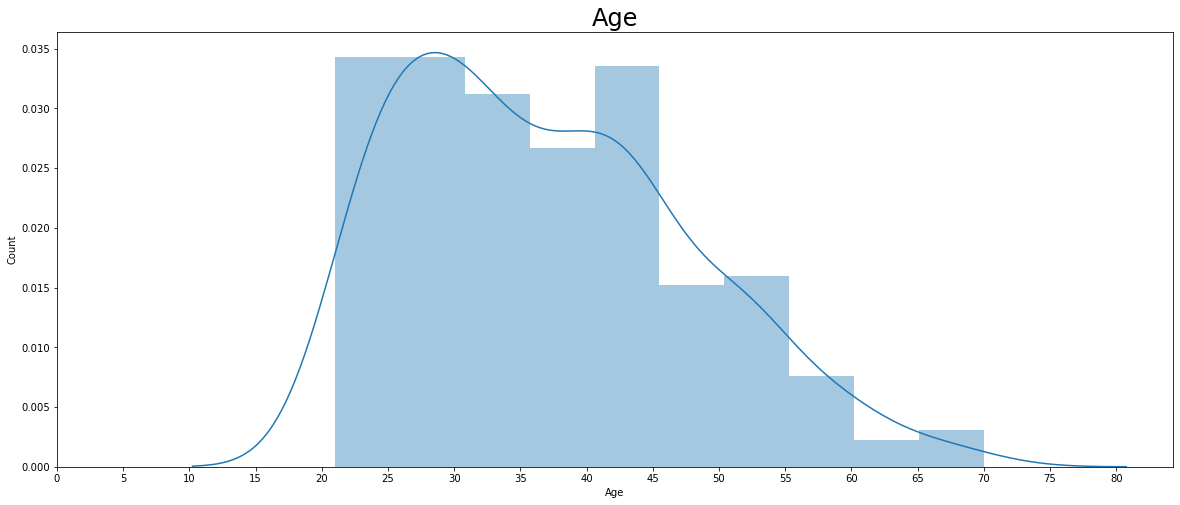

In [21]:
fig = plt.figure(figsize=(20,8))

sns.distplot(data['Age'][data['Outcome'] == 1])
plt.xticks([i for i in range (0,85,5)])
plt.ylabel('Count')
plt.title('Age',fontsize=24)

# MODEL BUILDING

# K-Nearest Neighbor

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25, metric='minkowski')
#n_neighbors is taken as 25 as the square of 25 is nearer to 614 i.e., 25^2 = 625 which is nearer to 614
#Here the factor chosen for the model is distance i.e., 'minkowski'
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [23]:
knn_y_pred = knn.predict(x_test)

In [24]:
knn_y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

<AxesSubplot:>

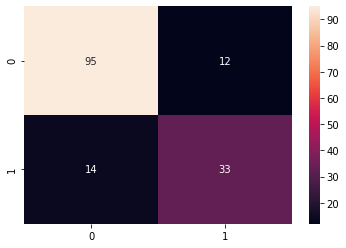

In [25]:
#comnfusion matric for checking how many predictions are precise
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(knn_cm, annot=True)

In the above heatmap 0,0 represents true negative, 1,1 represents true positive where as 0,1 shows that the the model predicted it to be positive where it's actually negative similarly 1,0 is that predicted value it's negative but its actually positive are present so we need to tune this modle further.

In [26]:
# Calculating the accuracy

print('accuracy of K-Nearest Neighbor model is: {}'.format(sum(knn_y_pred==y_test)/len(knn_y_pred)))

accuracy of K-Nearest Neighbor model is: 0.8311688311688312


# Simple Vector Machine

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [28]:
svc_y_pred = svc.predict(x_test)

<AxesSubplot:>

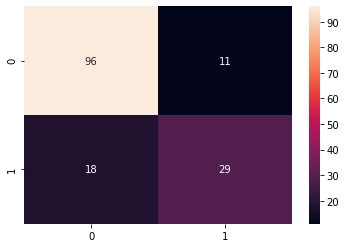

In [29]:
svc_cm = confusion_matrix(y_test,svc_y_pred)
sns.heatmap(svc_cm, annot=True)

In [30]:
print('accuracy of Simple Vector Machine model is: {}'.format(sum(svc_y_pred==y_test)/len(svc_y_pred)))

accuracy of Simple Vector Machine model is: 0.8116883116883117


Here the accuracy is a bit low but the dangarous result of showing negative while it's positive is are more than the before model so using this model may be a bit dangerous.

# Navie Bais

In [31]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [32]:
nb_y_pred = nb_classifier.predict(x_test)

<AxesSubplot:>

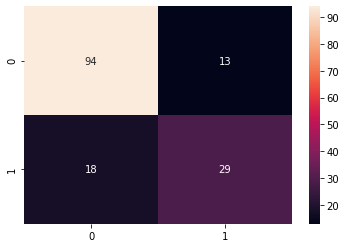

In [33]:
nb_cm = confusion_matrix(y_test,nb_y_pred)
sns.heatmap(nb_cm, annot=True)

In [34]:
print('accuracy of Navie Bais model is: {}'.format(sum(nb_y_pred==y_test)/len(nb_y_pred)))

accuracy of Navie Bais model is: 0.7987012987012987


This model has less accuracy than the above both models and the dangerous prediction results are also more so this is the least favoured model